In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


Load Netflix dataset

In [167]:
path = "C:/AI-ML/AI_MI_Career/datasets/netflix_titles.csv"
netflix = pd.read_csv(path)
print("Dataset loaded successfully!")


Dataset loaded successfully!


In [168]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


1: Basic Data Understanding
- How many total records are there?
- What are the data types of each column?
- Are there any missing/null values?
- Count of unique values per column.

In [169]:
#How many total records are there?
total_records = netflix.shape[0]
print(f"Total records: {total_records}")
#What are the data types of each column?
data_types = netflix.dtypes
print("Data types of each column:")
print(data_types)

Total records: 8807
Data types of each column:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


Missing values in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


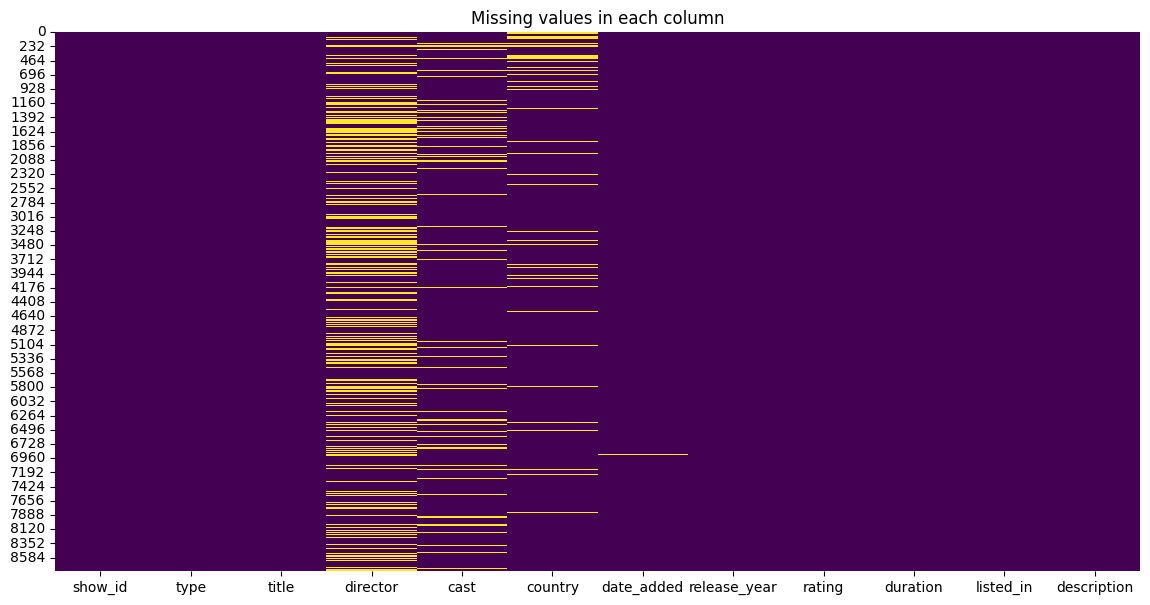

In [170]:
#Are there any missing/null values?
missing_values = netflix.isnull().sum()
print("Missing values in each column:")
print(missing_values)
plt.figure(figsize=(14,7))
sns.heatmap(netflix.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values in each column")
plt.xlabel
plt.show()

In [171]:
#Count of unique values per column.
unique_counts = netflix.nunique()
print("Count of unique values per column:")
print(unique_counts)

Count of unique values per column:
show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64


2: Basic Exploration
- How many unique titles, directors, and countries are there?
- Identify any columns with missing values and their percentages.
- Count how many entries fall under each type: Movie or TV Show.

In [172]:
#How many unique titles, directors, and countries are there?
unique_counts = netflix[['title', 'director', 'country']].nunique()
print("Unique counts for titles, directors, and countries:")
print(unique_counts)


Unique counts for titles, directors, and countries:
title       8807
director    4528
country      748
dtype: int64


In [173]:
#Identify any columns with missing values and their percentages.
missing_percentage = netflix.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


type
Movie      6131
TV Show    2676
Name: count, dtype: int64


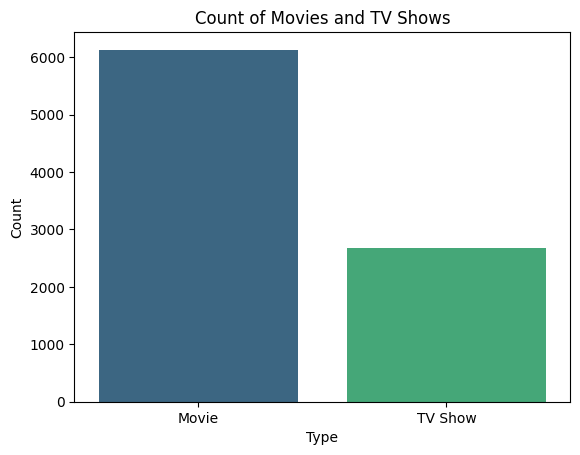

In [174]:
#Show the distribution of content by type (Movie vs TV Show).
print(netflix['type'].value_counts())
sns.countplot(data=netflix, x='type', order=netflix['type'].value_counts().index, 
    palette='viridis',legend=False)
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


3: Content Distribution
- Find the top 5 most common genres (listed_in) across all content.
- What are the top 10 countries with the most content on Netflix?

Top 5 most common genres:
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


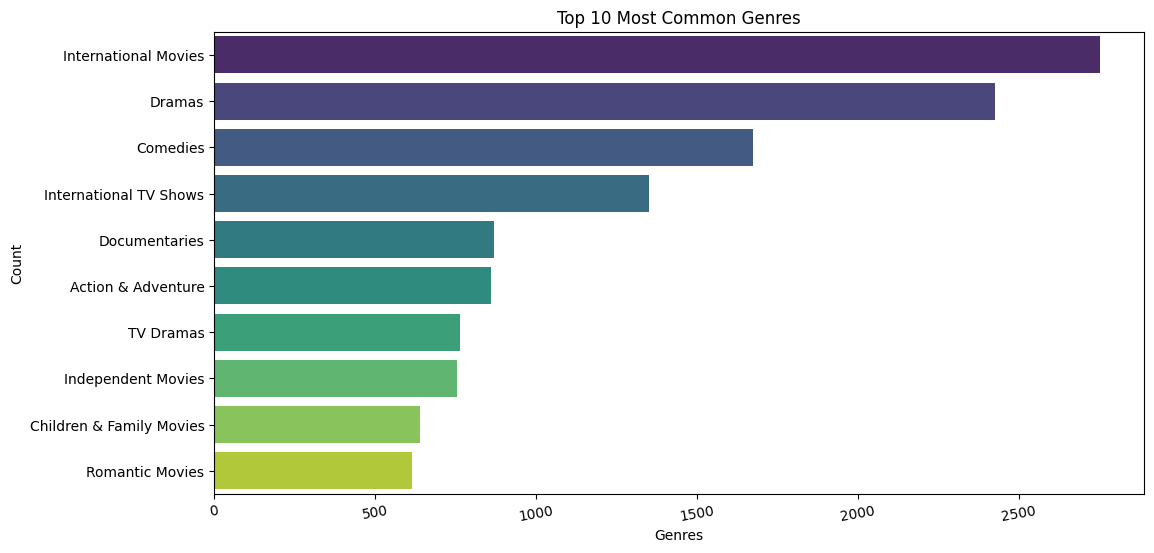

In [175]:
#Find the top 5 most common genres (listed_in) across all content.
top_genres = netflix['listed_in'].str.split(', ').explode().value_counts().head(10)
print("Top 5 most common genres:") 
print(top_genres)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.xticks(rotation=10)
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()


Top 10 countries with the most content on Netflix:
country
United States     5002
India             2626
United Kingdom     957
Japan              588
South Korea        566
Spain              383
Canada             347
France             306
Turkey             278
Mexico             271
Name: count, dtype: int64


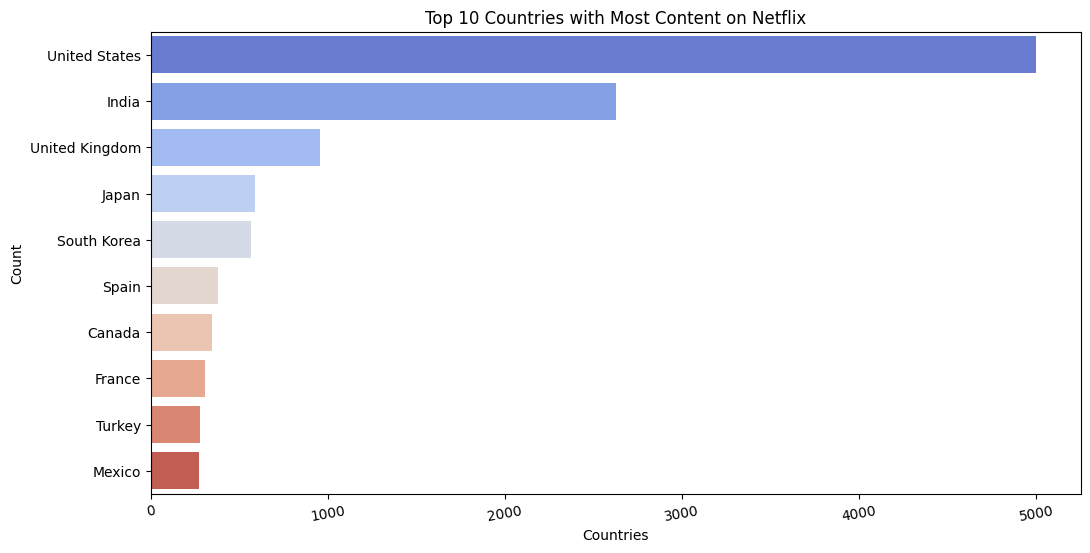

In [176]:
#What are the top 10 countries with the most content on Netflix?
countries_genres = netflix.groupby('country')['listed_in'].apply(lambda x: ', '.join(x)).reset_index()
countries_genres['listed_in'] = countries_genres['listed_in'].str.split(', ')
countries_genres = countries_genres.explode('listed_in')
top_countries_genres = countries_genres['country'].value_counts().head(10)
print("Top 10 countries with the most content on Netflix:")
print(top_countries_genres)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_genres.values, y=top_countries_genres.index, palette='coolwarm')
plt.xticks(rotation=10)
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

4: People-Centric Analysis
- Who are the top 10 directors with the most Netflix shows/movies?
- Which actors appear most frequently in the cast column?
- Which movies/shows have no listed director?

Top 10 directors with the most Netflix shows/movies:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


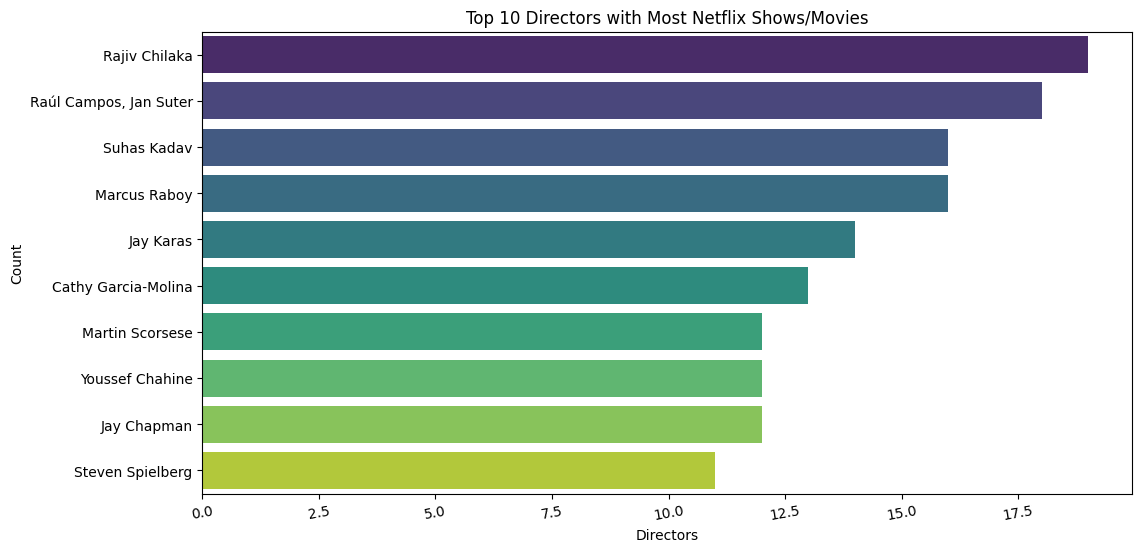

In [177]:
top_directors = netflix['director'].value_counts().head(10)
print("Top 10 directors with the most Netflix shows/movies:")
print(top_directors)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.xticks(rotation=10)
plt.title('Top 10 Directors with Most Netflix Shows/Movies')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.show()

Top 10 actors appearing most frequently in the cast column:
cast
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Amitabh Bachchan     28
Paresh Rawal         28
Boman Irani          27
Rajesh Kava          26
Vincent Tong         26
Andrea Libman        25
Kareena Kapoor       25
John Cleese          24
Samuel L. Jackson    24
Tara Strong          23
Jigna Bhardwaj       23
Name: count, dtype: int64


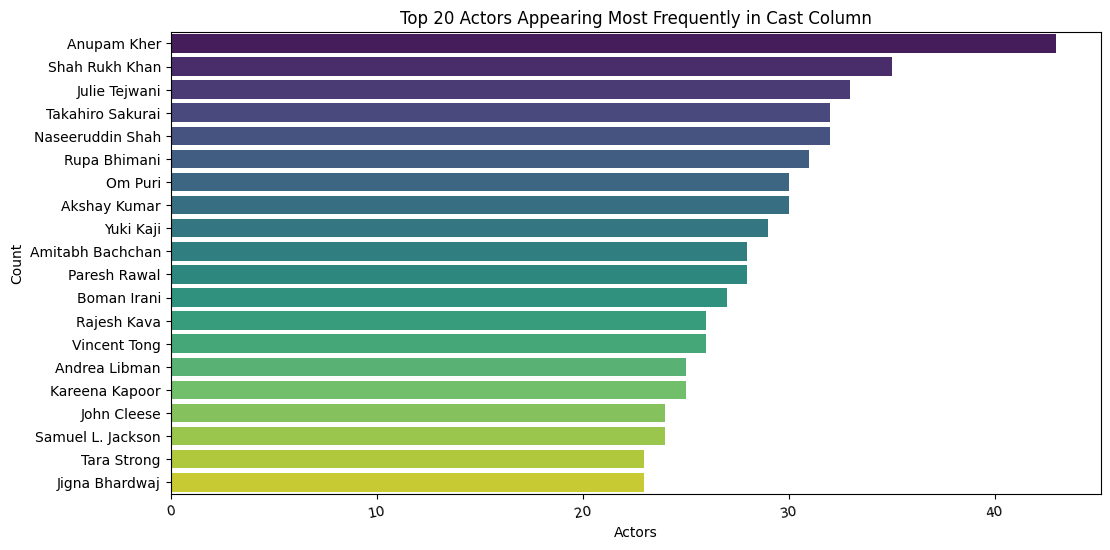

In [178]:
top_actors = netflix['cast'].str.split(', ').explode().value_counts().head(20)
print("Top 10 actors appearing most frequently in the cast column:") 
print(top_actors)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')
plt.xticks(rotation=10)
plt.title('Top 20 Actors Appearing Most Frequently in Cast Column')
plt.xlabel('Actors')
plt.ylabel('Count')
plt.show()


Movies/Shows with no listed director:
                                  title     type
1                         Blood & Water  TV Show
3                 Jailbirds New Orleans  TV Show
4                          Kota Factory  TV Show
10  Vendetta: Truth, Lies and The Mafia  TV Show
14      Crime Stories: India Detectives  TV Show
15                    Dear White People  TV Show
17                      Falsa identidad  TV Show
19                               Jaguar  TV Show
21               Resurrection: Ertugrul  TV Show
25                 Love on the Spectrum  TV Show


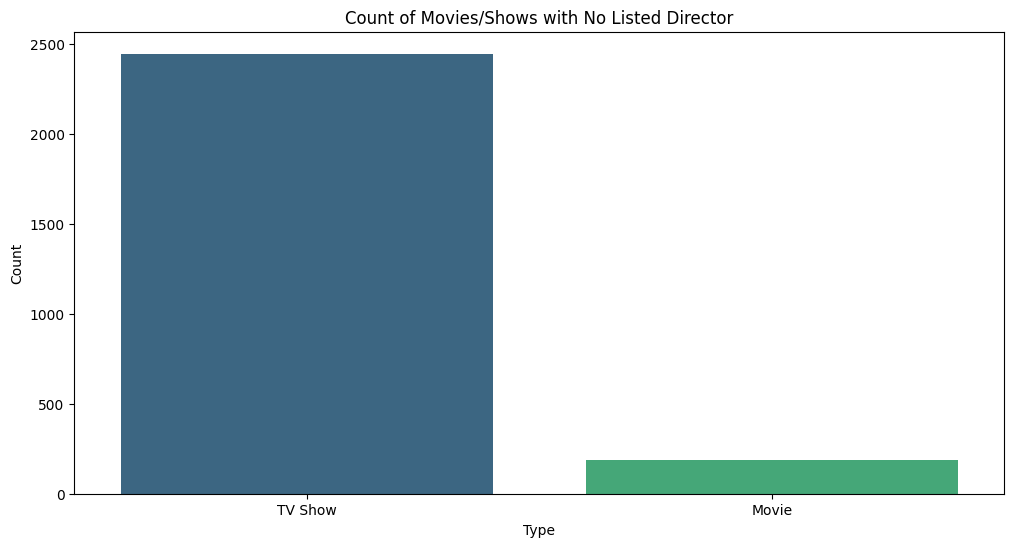

In [179]:
no_director = netflix[netflix['director'].isnull()]
print("Movies/Shows with no listed director:") 
print(no_director[['title', 'type']].head(10))
plt.figure(figsize=(12, 6))
sns.countplot(data=no_director, x='type', order=no_director['type'].value_counts().index, 
    palette='viridis',legend=False)
plt.title('Count of Movies/Shows with No Listed Director')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()



5: Time-Based Trends
- Show the number of releases per release_year.
- What year had the most content released?
- Based on date_added, what is the monthly trend of Netflix additions?
- How many shows were added in each month of the year, across years?

Number of releases per release_year:
year
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: count, dtype: Int64


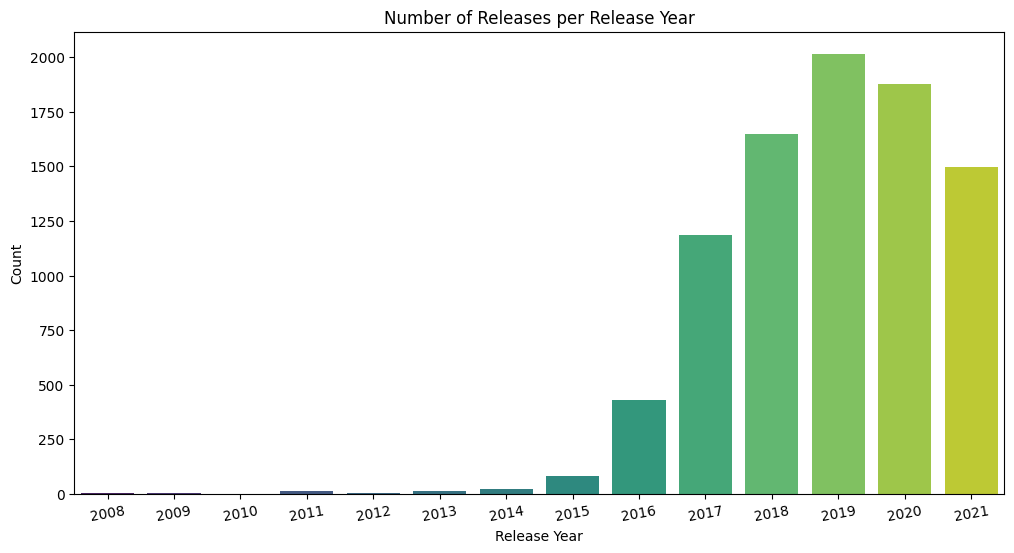

In [180]:
netflix['release_year'] = pd.to_datetime(netflix['date_added'], format= 'mixed', errors ='coerce')
netflix['year'] = netflix['release_year'].dt.year.astype('Int64')
releases_per_year = netflix['year'].value_counts().sort_index()
print("Number of releases per release_year:")
print(releases_per_year)
plt.figure(figsize=(12, 6))
sns.barplot(x=releases_per_year.index, y=releases_per_year.values, palette='viridis')
plt.xticks(rotation=10)
plt.title('Number of Releases per Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [181]:
top_content_year = releases_per_year.idxmax()
print(f"The year with the most content released is: {top_content_year}")


The year with the most content released is: 2019


Monthly trend of Netflix additions:
date_added
2021-09    183
2021-08    178
2021-07    257
2021-06    207
2021-05    132
2021-04    188
2021-03    112
2021-02    109
2021-01    132
2020-12    169
2020-11    154
2020-10    167
2020-09    168
2020-08    129
2020-07    146
2020-06    156
2020-05    157
2020-04    177
2020-03    137
2020-02    114
Freq: M, Name: count, dtype: int64


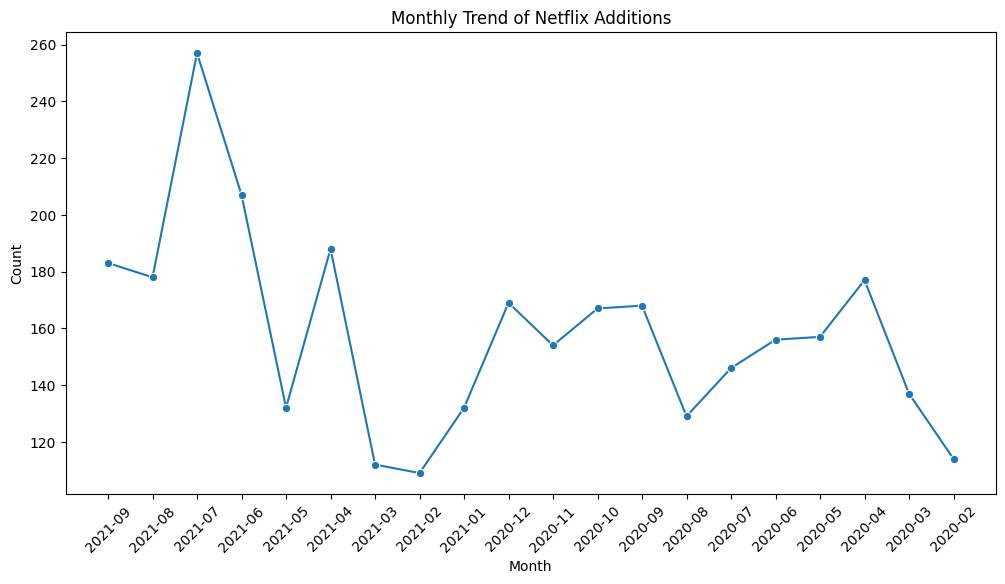

In [182]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
monthly_trend = netflix['date_added'].dt.to_period('M').value_counts().sort_index(ascending=False).head(20)
print("Monthly trend of Netflix additions:")
print(monthly_trend)
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_trend.index.astype(str), y=monthly_trend.values, marker='o', palette='viridis')
plt.xticks(rotation=45)
plt.title('Monthly Trend of Netflix Additions')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


Number of shows added in each month of the year, across years:
date_added
1.0     727
2.0     557
3.0     734
4.0     759
5.0     626
6.0     724
7.0     819
8.0     749
9.0     765
10.0    755
11.0    697
12.0    797
Name: count, dtype: int64


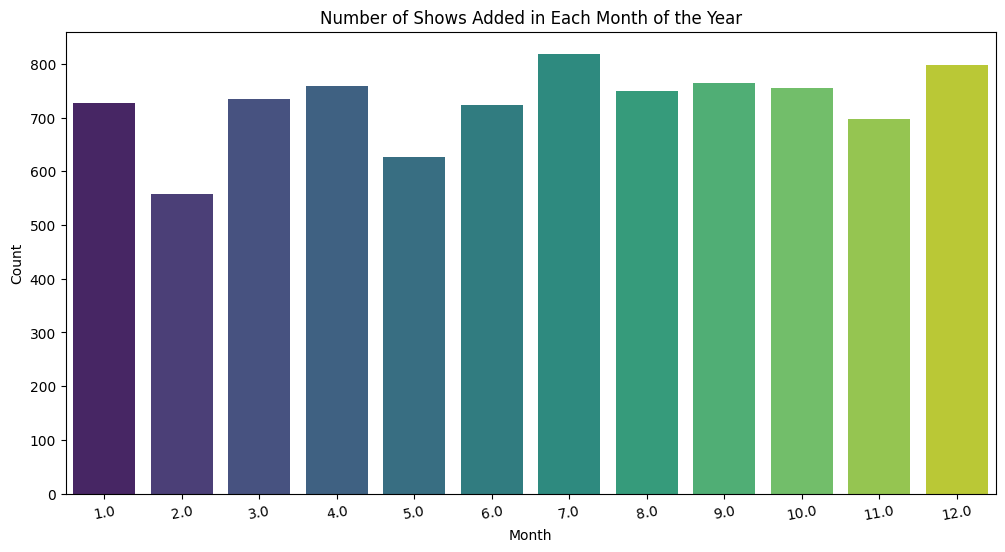

In [183]:
#How many shows were added in each month of the year, across years?
monthly_additions = netflix['date_added'].dt.month.value_counts().sort_index()
print("Number of shows added in each month of the year, across years:")
print(monthly_additions)
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_additions.index, y=monthly_additions.values, palette='viridis')
plt.xticks(rotation=10)
plt.title('Number of Shows Added in Each Month of the Year')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


6: Duration Insights
- For movies, find the most common durations in minutes.
- For TV Shows, what is the distribution of number of seasons?
- What are the top 10 longest movies on Netflix?

In [184]:
#For movies, find the most common durations in minutes.
movies_list = netflix[netflix['type'] == 'Movie']
movies_list['duration_min'] = movies_list['duration'].str.extract(r'(\d+)').astype('Int64')
most_common_duration = movies_list['duration_min'].value_counts().idxmax()
print(f"The most common duration for movies is: {most_common_duration} minutes")

The most common duration for movies is: 90 minutes


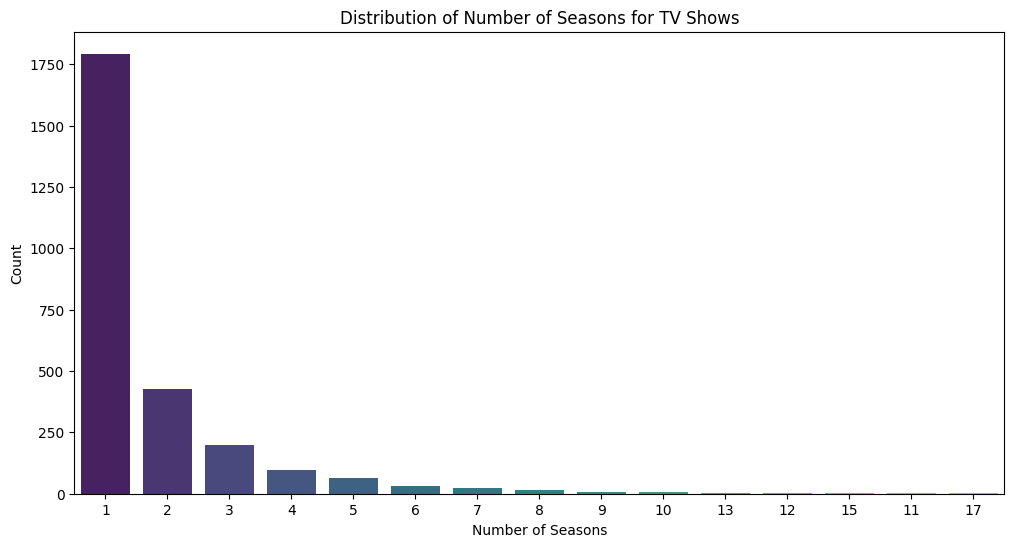

In [185]:
#For TV Shows, what is the distribution of number of seasons?
tv_shows = netflix[netflix['type'] == 'TV Show'].copy()
tv_shows['num_seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype('Int64')

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='num_seasons', data=tv_shows, palette='viridis', order=tv_shows['num_seasons'].value_counts().index)
plt.title('Distribution of Number of Seasons for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

Top 10 longest movies on Netflix:
                            title duration
4253   Black Mirror: Bandersnatch  312 min
717   Headspace: Unwind Your Mind  273 min
2491       The School of Mischief  253 min
2487               No Longer kids  237 min
2484           Lock Your Girls In  233 min
2488              Raya and Sakina  230 min
166   Once Upon a Time in America  229 min
7932                       Sangam  228 min
1019                       Lagaan  224 min
4573                 Jodhaa Akbar  214 min


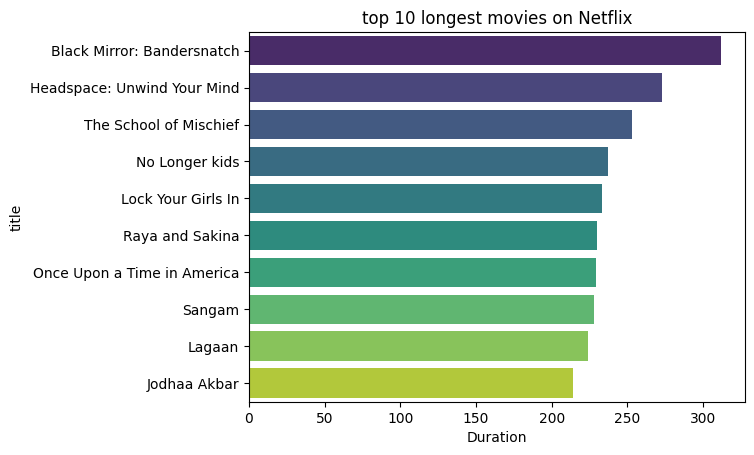

In [186]:
movies_list['duration_min'] = movies_list['duration'].str.extract(r'(\d+)').astype('Int64')
top5_longest_movies = movies_list.sort_values('duration_min', ascending=False).head(10)
print("Top 10 longest movies on Netflix:")
print(top5_longest_movies[['title', 'duration']])
plt.Figure(figsize=(12,6))
sns.barplot(x='duration_min',y='title',data = top5_longest_movies, palette='viridis')
plt.title('top 10 longest movies on Netflix')
plt.xlabel('Duration')
plt.ylabel('title')
plt.show()


7: Rating and Audience Analysis
- What are the top 5 most common ratings (rating column)?
- Create an age group mapping (e.g., Kids, Teens, Adults) based on rating and show the distribution.
- Are certain ratings more common in TV Shows or Movies?

<class 'pandas.core.series.Series'>
Index: 10 entries, TV-MA to NR
Series name: count
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0+ bytes
Top 10 common Rating rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


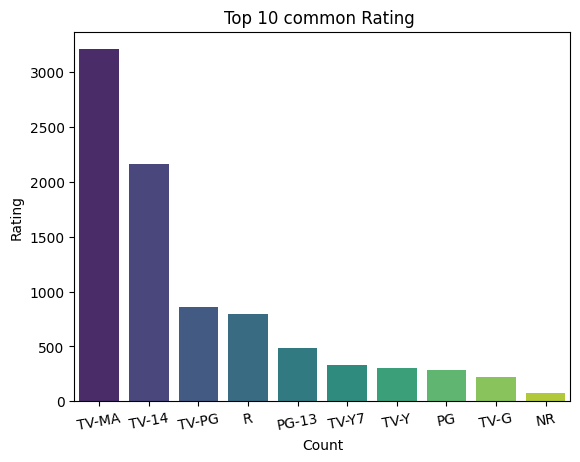

In [187]:
top_rating_count = netflix['rating'].value_counts().head(10)
top_rating_count.info()
print(f'Top 10 common Rating {top_rating_count}')
plt.Figure(figsize=(12,6))
sns.barplot(x=top_rating_count.index, y=top_rating_count.values, palette='viridis')
plt.xticks(rotation=10)
plt.title('Top 10 common Rating ')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

Age group distribution:
age_group
Adults    4092
Teens     3800
Kids       908
Others       7
Name: count, dtype: int64


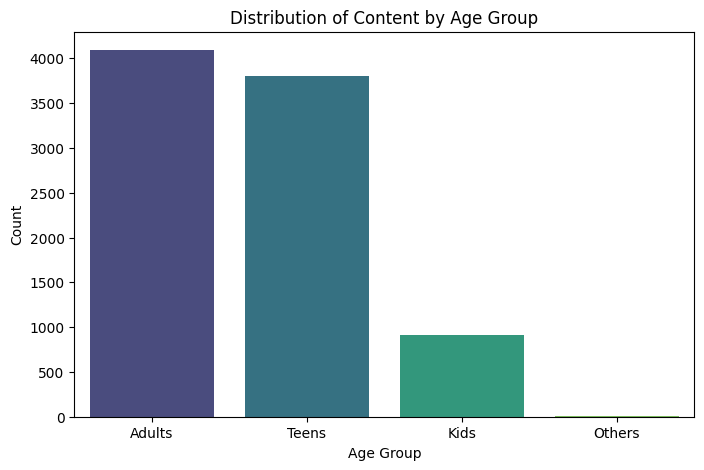

In [188]:
# Define age group mapping based on rating
age_group_map = {
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'TV-G': 'Kids',
    'TV-PG': 'Teens',
    'PG': 'Teens',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'TV-MA': 'Adults',
    'R': 'Adults',
    'NC-17': 'Adults',
    'NR': 'Adults',  # Not Rated, but often adult content
    'UR': 'Adults',  # Unrated
    'G': 'Kids',
    'TV-Y7-FV': 'Kids'
}

# Map ratings to age groups
netflix['age_group'] = netflix['rating'].map(age_group_map).fillna('Others')

# Show the distribution
age_group_dist = netflix['age_group'].value_counts()
print("Age group distribution:")
print(age_group_dist)

plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_dist.index, y=age_group_dist.values, palette='viridis')
plt.title('Distribution of Content by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Ratings distribution by content type (Movie/TV Show):
rating   66 min  74 min  84 min   G  NC-17  NR   PG  PG-13    R  TV-14  TV-G  \
type                                                                           
Movie         1       1       1  41      3  75  287    490  797   1427   126   
TV Show       0       0       0   0      0   5    0      0    2    733    94   

rating   TV-MA  TV-PG  TV-Y  TV-Y7  TV-Y7-FV  UR  
type                                              
Movie     2062    540   131    139         5   3  
TV Show   1145    323   176    195         1   0  


<Figure size 1400x700 with 0 Axes>

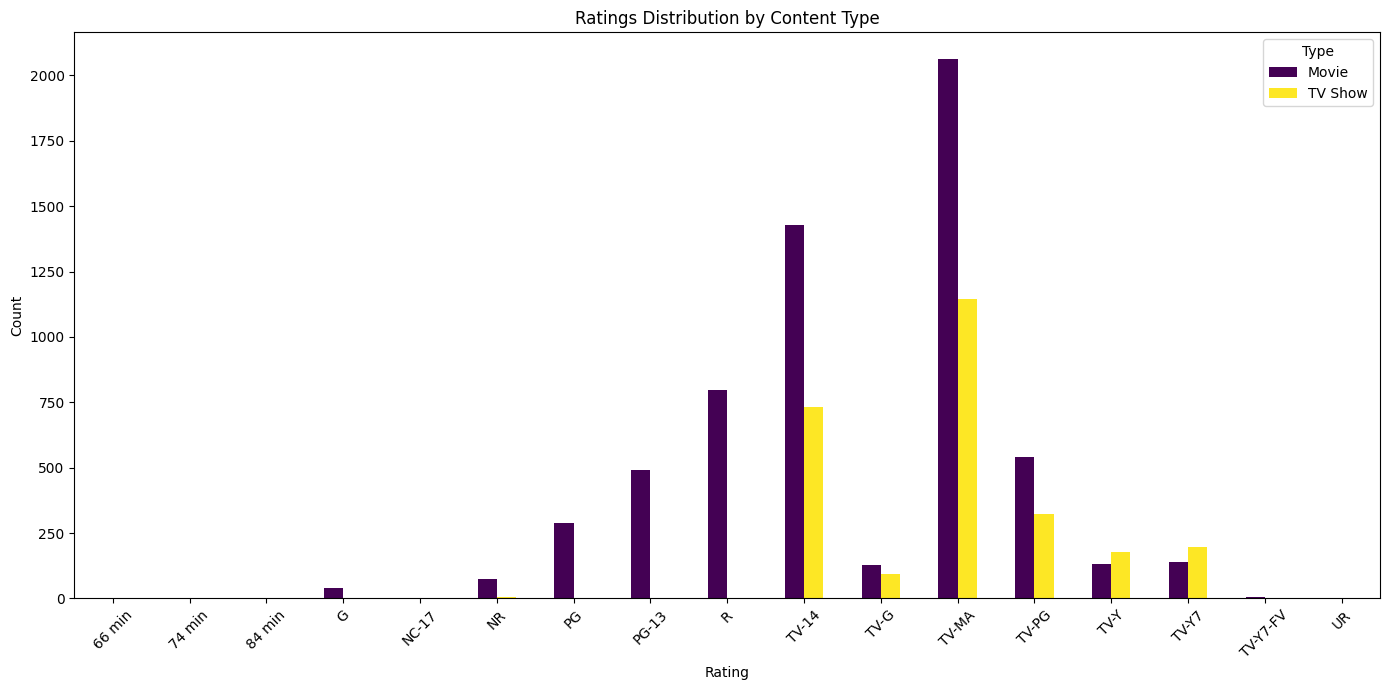

In [189]:
# Are certain ratings more common in TV Shows or Movies?
rating_type_counts = netflix.groupby(['type', 'rating']).size().unstack(fill_value=0)
print("Ratings distribution by content type (Movie/TV Show):")
print(rating_type_counts)

plt.figure(figsize=(14, 7))
rating_type_counts.T.plot(kind='bar', stacked=False, colormap='viridis', figsize=(14,7))
plt.title('Ratings Distribution by Content Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

8: Country & Content Relationship
- What is the distribution of content types per country?
- Which country has the highest number of movies?
- Which country has the highest number of TV shows?

Distribution of content types per country:
type                                                Movie  TV Show
country                                                           
, France, Algeria                                       1        0
, South Korea                                           0        1
Argentina                                              38       18
Argentina, Brazil, France, Poland, Germany, Den...      1        0
Argentina, Chile                                        2        0
Argentina, Chile, Peru                                  1        0
Argentina, France                                       1        0
Argentina, France, United States, Germany, Qatar        1        0
Argentina, Italy                                        1        0
Argentina, Spain                                        7        1


<Figure size 1200x600 with 0 Axes>

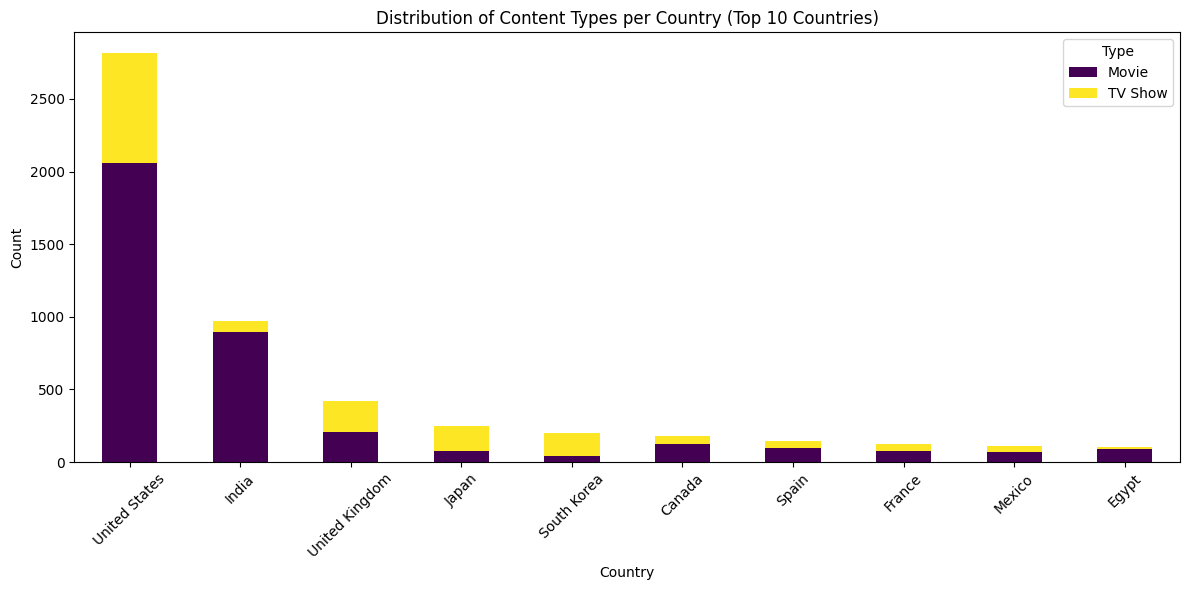

In [190]:
# Distribution of content types per country
country_type_dist = netflix.groupby(['country', 'type']).size().unstack(fill_value=0)
print("Distribution of content types per country:")
print(country_type_dist.head(10))

# Plot for top 10 countries by total content
top_countries = country_type_dist.sum(axis=1).sort_values(ascending=False).head(10).index
plt.figure(figsize=(12, 6))
country_type_dist.loc[top_countries].plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,6))
plt.title('Distribution of Content Types per Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

Top 10 countries has the highest number of movies:
country
United States     2751
India              962
United Kingdom     532
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: count, dtype: int64


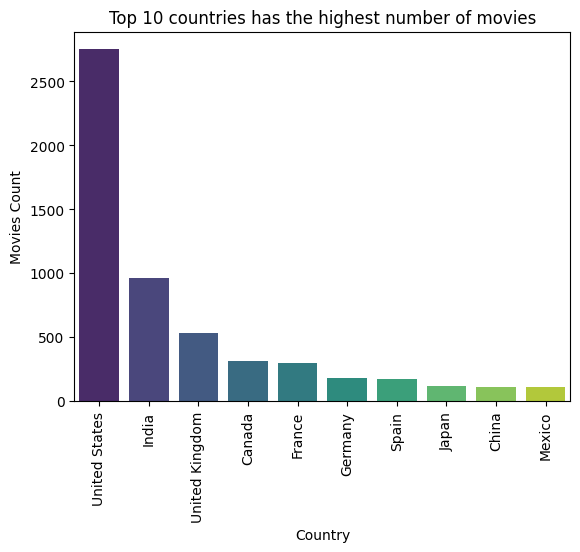

In [191]:
movies_country = netflix[netflix['type'] == 'Movie']
top_country_movie = movies_country['country'].str.split(', ').explode().value_counts().head(10)
print("Top 10 countries has the highest number of movies:") 
print(top_country_movie)
plt.Figure(figsize=(14,7))
sns.barplot(x=top_country_movie.index, y=top_country_movie.values, palette='viridis')
plt.xticks(rotation=90)
plt.title("Top 10 countries has the highest number of movies")
plt.xlabel("Country")
plt.ylabel('Movies Count')
plt.show()

Top 10 countries has the highest number of TV Show:
country
United States     938
United Kingdom    272
Japan             199
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Spain              61
Name: count, dtype: int64


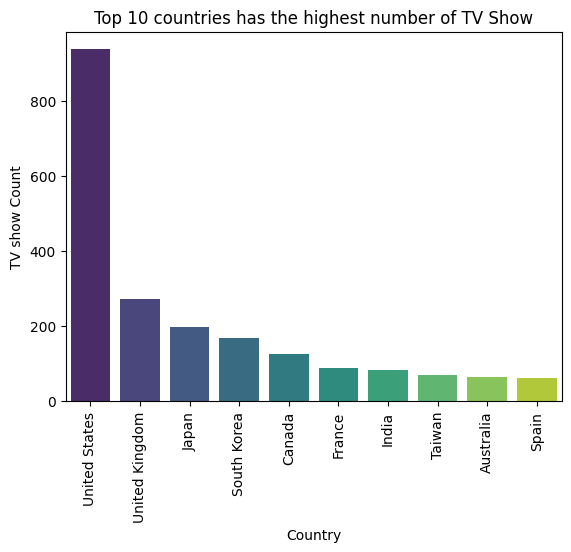

In [192]:
TV_country = netflix[netflix['type'] == 'TV Show']
top_country_TV = TV_country['country'].str.split(', ').explode().value_counts().head(10)
print("Top 10 countries has the highest number of TV Show:") 
print(top_country_TV)
plt.Figure(figsize=(14,7))
sns.barplot(x=top_country_TV.index, y=top_country_TV.values, palette='viridis')
plt.xticks(rotation=90)
plt.title("Top 10 countries has the highest number of TV Show")
plt.xlabel("Country")
plt.ylabel('TV show Count')
plt.show()

9: Keyword-Based Text Mining
- How many titles contain words like "Love", "War", "Family", or "Crime"?
- Create a word cloud from the description field to highlight common themes.

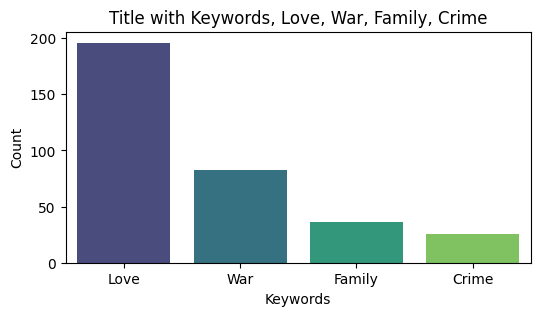

In [193]:
title_words = ['Love', 'War', 'Family', 'Crime']
love_count = netflix['title'].str.contains(title_words[0],case= False, na=False).sum()
War_count = netflix['title'].str.contains(title_words[1],case= False, na=False).sum()
Family_count = netflix['title'].str.contains(title_words[2],case= False, na=False).sum()
Crime_count = netflix['title'].str.contains(title_words[3],case= False, na=False).sum()
counts = [love_count, War_count, Family_count, Crime_count]
title_df = pd.DataFrame({'keyword': title_words, 'Count': counts}).sort_values(by='Count',ascending=False)
title_df.head()
plt.figure(figsize=(6,3))
sns.barplot(x=title_df['keyword'], y=title_df['Count'], palette='viridis')
plt.title('Title with Keywords, Love, War, Family, Crime')
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.show()


In [194]:
%pip install wordcloud


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [195]:
from wordcloud import WordCloud

In [196]:
text = ' '.join(netflix['description'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)


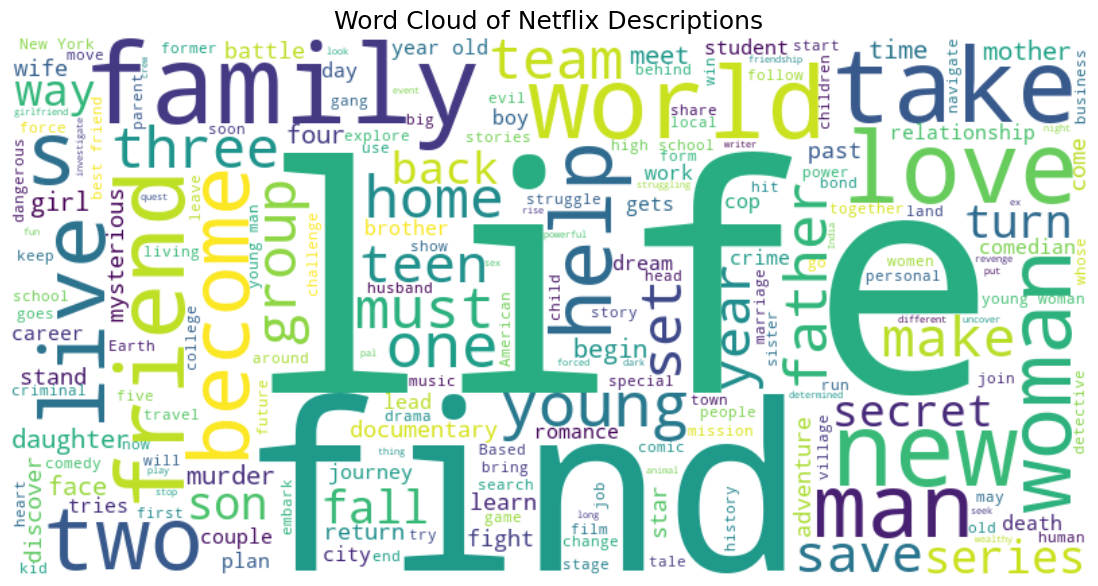

In [197]:
# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Descriptions', fontsize=18)
plt.show()

10: Complex Grouping Tasks
- Group by country and release_year → how many titles per year for top 3 countries?
- Group by rating and type to analyze how age ratings differ between movies and TV shows.

Number of titles per year for top 3 countries:
year            2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
country                                                                      
India              0     0     0     0     0     0     0     0    13   162   
United Kingdom     0     0     0     1     0     1     2     8    54   134   
United States      2     1     1    12     3    10    22    57   203   462   

year            2018  2019  2020  2021  
country                                 
India            349   218   199   105  
United Kingdom   147   191   146   119  
United States    599   856   828   627  


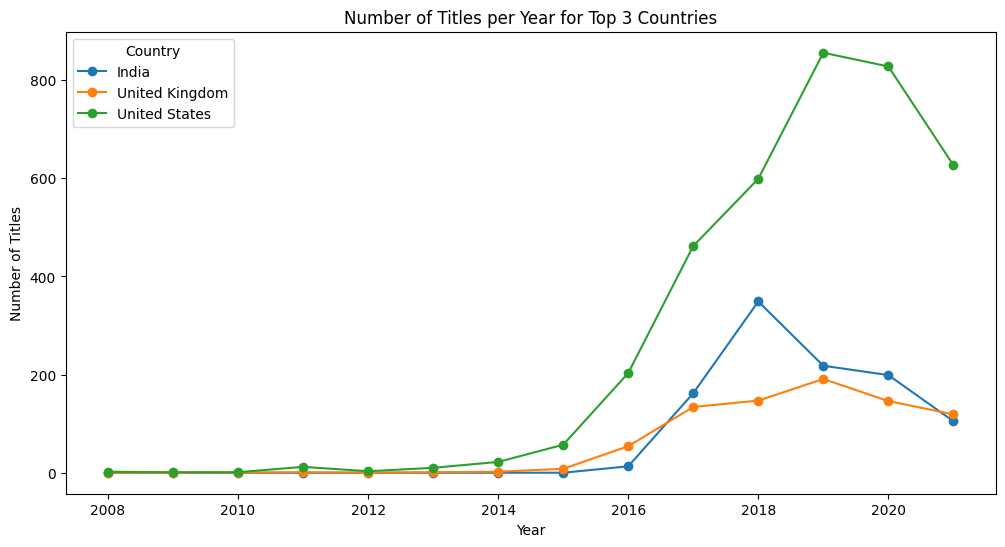

In [198]:
# Get the top 3 countries by total content count
top3_countries = top_countries[0:3]

# Split countries and explode so each row has a single country
netflix_country_year = netflix[['title', 'country', 'year']].dropna(subset=['country', 'year']).copy()
netflix_country_year['country'] = netflix_country_year['country'].str.split(', ')
netflix_country_year = netflix_country_year.explode('country')

# Filter for top 3 countries
netflix_top3 = netflix_country_year[netflix_country_year['country'].isin(top3_countries)]

# Group by country and year, count titles
titles_per_year = netflix_top3.groupby(['country', 'year']).size().unstack(fill_value=0)
print("Number of titles per year for top 3 countries:")
print(titles_per_year)

# Plot
titles_per_year.T.plot(figsize=(12,6), marker='o')
plt.title('Number of Titles per Year for Top 3 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Country')
plt.show()

Age ratings distribution between Movies and TV Shows:
type      Movie  TV Show
rating                  
66 min        1        0
74 min        1        0
84 min        1        0
G            41        0
NC-17         3        0
NR           75        5
PG          287        0
PG-13       490        0
R           797        2
TV-14      1427      733
TV-G        126       94
TV-MA      2062     1145
TV-PG       540      323
TV-Y        131      176
TV-Y7       139      195
TV-Y7-FV      5        1
UR            3        0


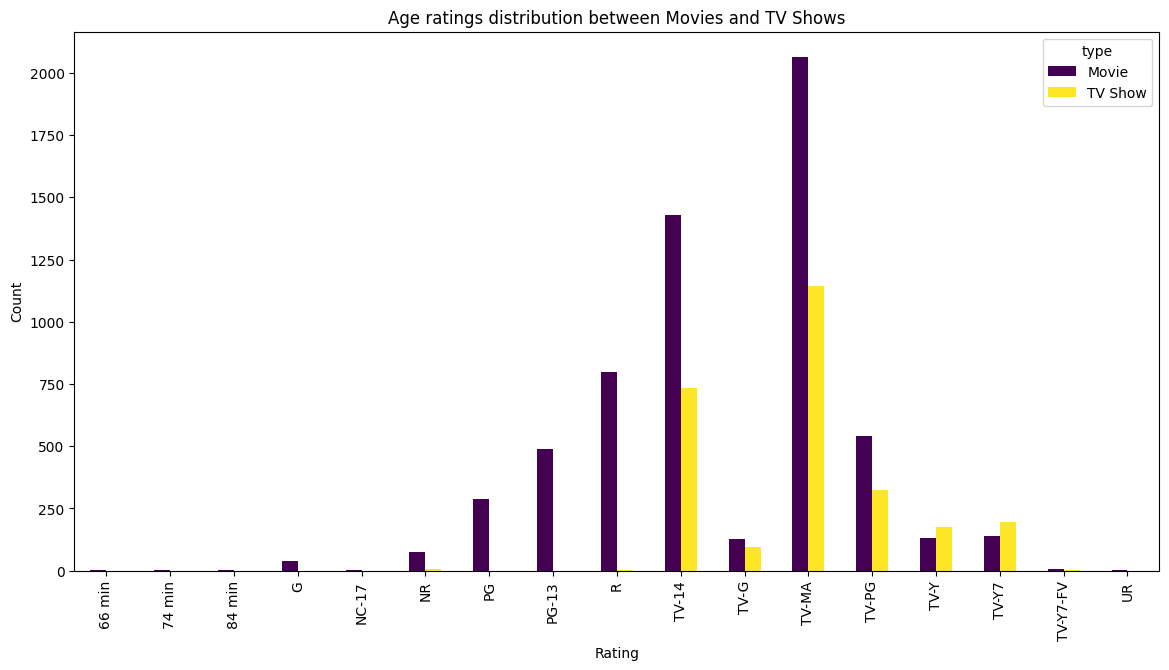

In [199]:
netflix_ageing_type = netflix.groupby(['rating','type']).size().unstack(fill_value=0)
print("Age ratings distribution between Movies and TV Shows:")
print(netflix_ageing_type)
plt.Figure(figsize=(8,4))
netflix_ageing_type.plot(kind='bar',stacked=False, colormap='viridis',figsize=(14,7))
plt.title("Age ratings distribution between Movies and TV Shows")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()